<a href="https://colab.research.google.com/github/dearsun3291/Evaluation-Project-3---Avocado/blob/main/Evaluation_Project_3_Avocado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluation Project 3 - Avocado

Objective - To develop a model to predict 1)City/Region of observation 2) Average sales

Approach : There are different targets variable & both require different approach:
A - For predicting City/Region - Classification approach will be suitable
B - For predicting price - Regression approach will be suitable

# Importing required libraries

In [1]:
# All major libraries are imported using pyforest
import pandas as pd
import numpy as np


# Importing Dataset

In [5]:
from google.colab import files
uploaded = files.upload()

Saving avocado.csv to avocado (3).csv


av = pd.read_csv(io.BytesIO(uploaded['avocado.csv']))

In [6]:
from io import BytesIO
av = pd.read_csv(BytesIO(uploaded['avocado.csv']))

# Loading Datset

In [7]:
av.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


1. Dataset has 18,249 Rows and 14 Columns
2. Unnamed & Date columns can be droped
3. Type & Region columns will require to be encoded
4. Since the data presented in different sclae, hence will also require scaling
5. Dataset seems to be having high number of zeros, which will not allow model to learn appropreately

# Performing EDA

In [8]:
av.columns # Checking all column names

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [9]:
av.drop(['Unnamed: 0','Date'],axis =1, inplace =True) # dropping the two columns
av.replace(0,np.NaN, inplace = True) # To check 

In [10]:
for col in ['4046','4225','4770','Total Bags','Small Bags', 'Large Bags', 'XLarge Bags']:
    av[col].fillna(av[col].mean(), inplace =True) # Filling all "0"s with mean values of each column

Though numerous approaches have been tried namely eliminating all zeros, droping columns with max zeros but is not impacting model accuracy hence all zeros are replaced with mean

In [11]:
av.shape # checking data shape 

(18249, 12)

In [12]:
av.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(2)
memory usage: 1.7+ MB


1. After filling dataset with mean values there is no null value
2. Dataset has float, int & object.
3. Object data type shall be addressed before passing data to model

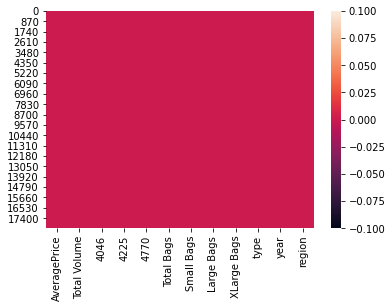

In [14]:
# To confirm null values visually
import seaborn as sns
sns.heatmap(av.isnull())

In [15]:
# Yearly mean prices
av.groupby('year')['AveragePrice'].mean() 

year
2015    1.375590
2016    1.338640
2017    1.515128
2018    1.347531
Name: AveragePrice, dtype: float64

Highest mean prices received was in year 2017

In [16]:
av.groupby('type')['AveragePrice'].mean()  # Mean prices of each type of produce

type
conventional    1.158040
organic         1.653999
Name: AveragePrice, dtype: float64

Organic Products are costlier

In [17]:
# Yield of different type each year
av.groupby('year')['type'].value_counts()

year  type        
2015  conventional    2808
      organic         2807
2016  conventional    2808
      organic         2808
2017  conventional    2862
      organic         2860
2018  conventional     648
      organic          648
Name: type, dtype: int64

2017 has been year max yield

In [18]:
list = ['AveragePrice', 'Total Volume','type', 'region']
for i in list:
    print(f'In column {i} min value is {av[i].min()}')

In column AveragePrice min value is 0.44
In column Total Volume min value is 84.56
In column type min value is conventional
In column region min value is Albany


In [19]:
list = ['AveragePrice', 'Total Volume', 'type', 'region']
for i in list:
    print(f'In column {i} max value is {av[i].max()}')

In column AveragePrice max value is 3.25
In column Total Volume max value is 62505646.52
In column type max value is organic
In column region max value is WestTexNewMexico


From above calculation we can conclude:
    1. Least price received is 0.44 & Max 3.25
    2. Least farmed products are conventional type avocados
    3. Albany contributes least & WesttexNewMaxico is good for growing avocados

In [20]:
av.describe() # To check statistical summary

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.969462e+05,2.961445e+05,3.268525e+04,2.398363e+05,1.837961e+05,6.244825e+04,9141.941192,2016.147899
std,0.402677,3.453545e+06,1.264533e+06,1.203999e+06,1.064126e+05,9.862184e+05,7.459830e+05,2.430611e+05,17154.842200,0.939938
min,0.440000,8.456000e+01,1.000000e+00,1.260000e+00,8.300000e-01,3.090000e+00,2.520000e+00,9.700000e-01,1.000000,2015.000000
25%,1.100000,1.083858e+04,9.750900e+02,3.086950e+03,3.786500e+02,5.108010e+03,3.125050e+03,9.187500e+02,4489.840000,2015.000000
50%,1.370000,1.073768e+05,9.954770e+03,2.977364e+04,1.111933e+04,3.992521e+04,2.787623e+04,7.942080e+03,9141.941192,2016.000000
75%,1.660000,4.329623e+05,1.217699e+05,1.542584e+05,3.268525e+04,1.112384e+05,8.620928e+04,6.244825e+04,9141.941192,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


Count is equal for all columns
Mean > Median in all columns
Data is very spread, std is high
difference between 75% & max is large indicating towards presence of outliers

In [21]:
av.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648404
4225             8.942752
4770            10.188362
Total Bags       9.756195
Small Bags       9.541851
Large Bags       9.807586
XLarge Bags     13.348825
year             0.215339
dtype: float64

Skwness is significant in Average Price, Total Volume, 4046,4225,4770, Total Bags, Samll Bags, Large Bags, XLarge Bags i.e more than +/-0.5 which shall be treated

Significant data is with Zscore more than +/-3 as depicted by high standard deviation

# Visualization

Univariate

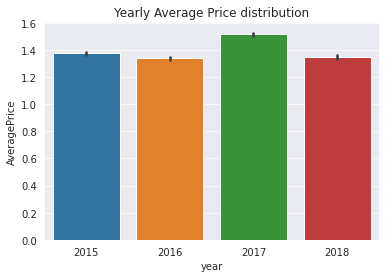

In [49]:
import matplotlib.pyplot as plt
sns.barplot(x = 'year', y = 'AveragePrice', data = av)
plt.title('Yearly Average Price distribution')
plt.show()

As seen with above calculations highest average price acheived is in 2017 even with higher yield

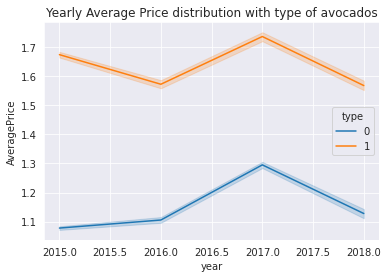

In [50]:
sns.lineplot(x = 'year', y = 'AveragePrice', hue = 'type' , data = av)
plt.title('Yearly Average Price distribution with type of avocados')
plt.show()

Over the year cost of organic produce is higher than conventional produce

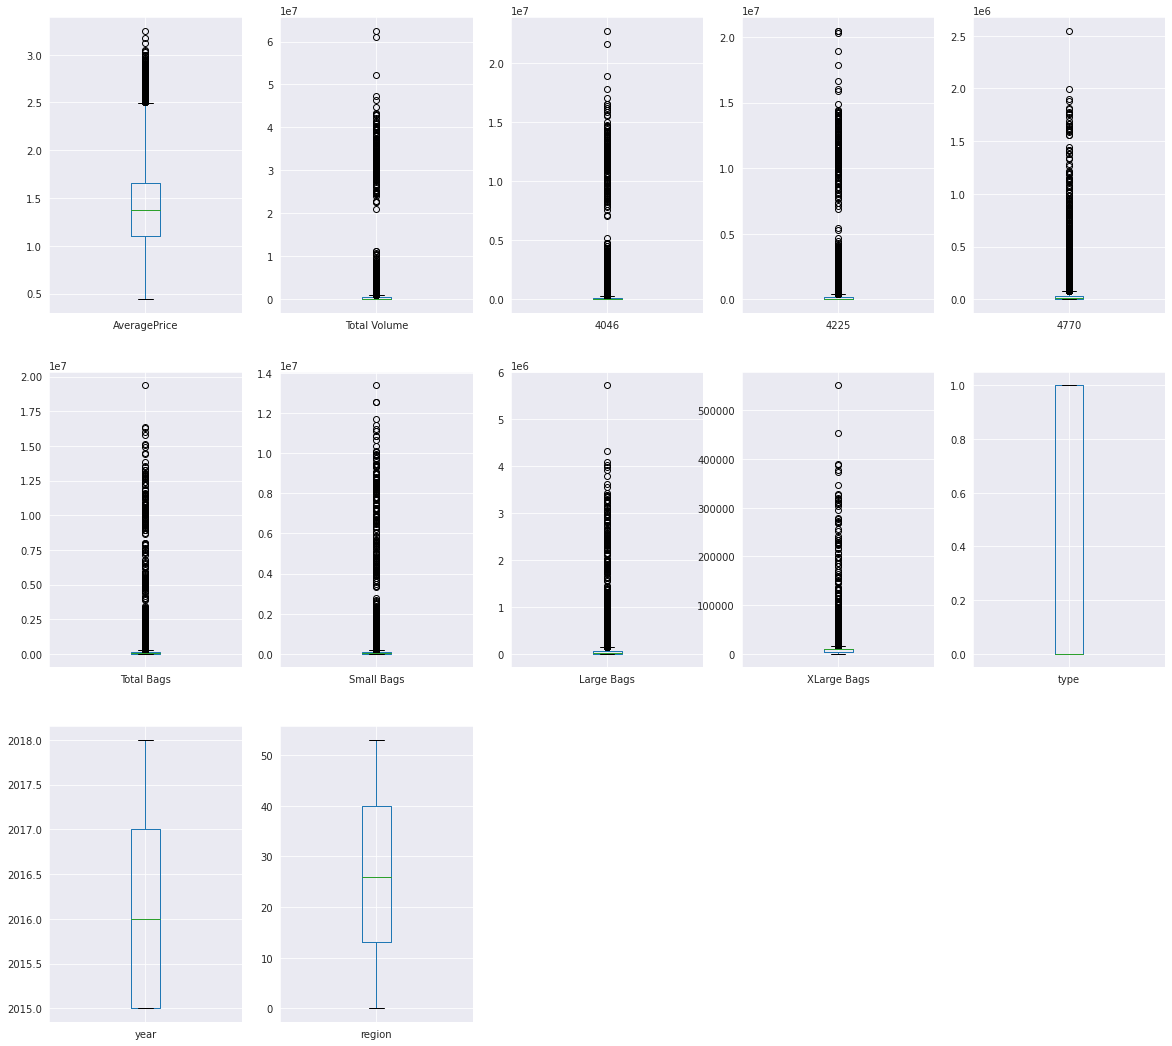

In [51]:
av.plot( kind = 'box', subplots = True, layout =(4,5), figsize=(20,25))
sns.set_style('darkgrid')
plt.show()

As confirmed in statistical description all columns are with outliers

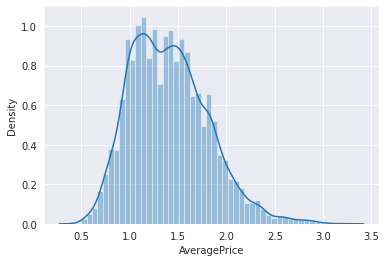

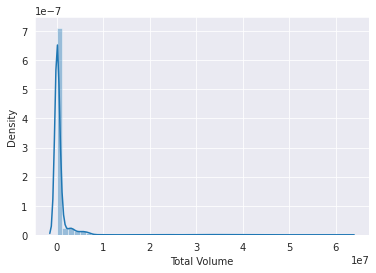

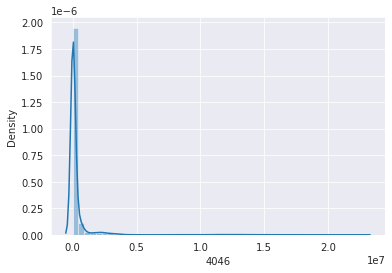

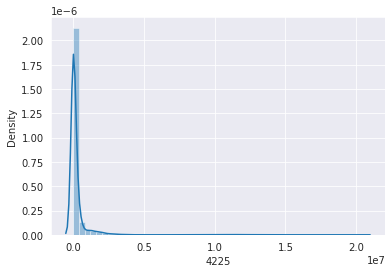

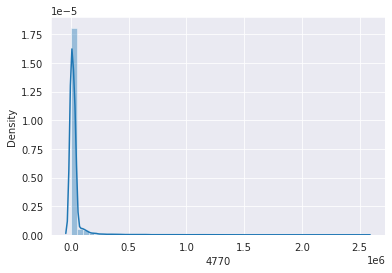

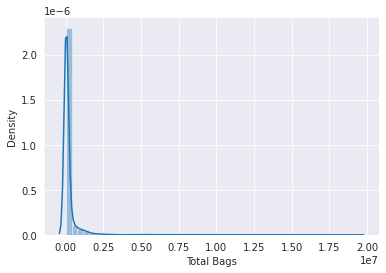

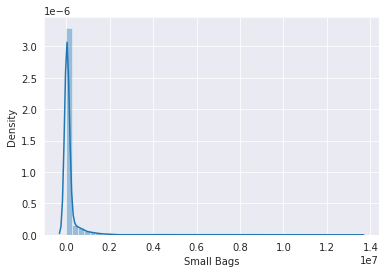

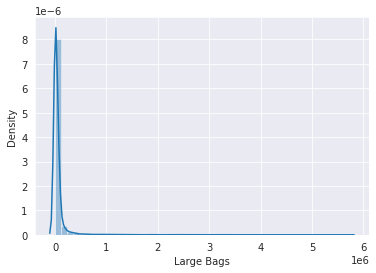

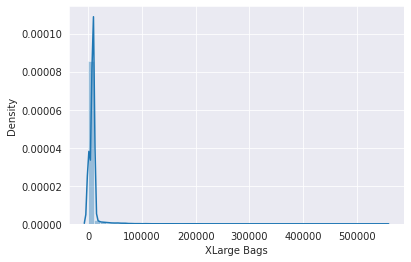

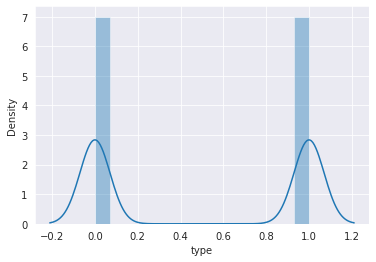

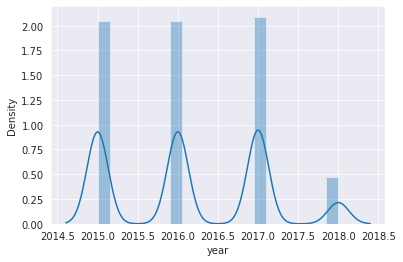

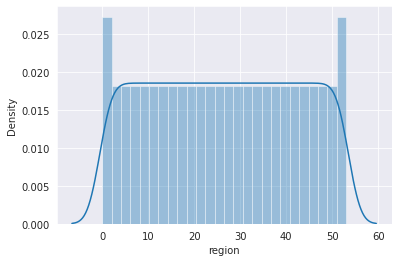

In [52]:
for i in av.describe().columns:
    sns.distplot(av[i])
    plt.show()

Though most columns display skewness

In [29]:
# Encoding columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
av['type'] = le.fit_transform(av['type'].astype(str))
av['region'] = le.fit_transform(av['region'].astype(str))

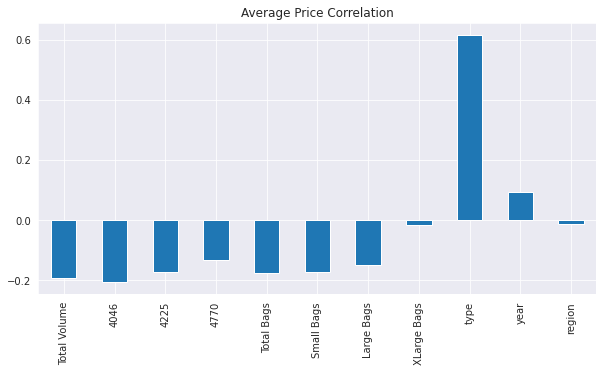

In [53]:
#Checking coorelation
plt.figure(figsize = (10,5))
av.drop('AveragePrice',axis=1).corrwith(av['AveragePrice']).plot(kind='bar')
plt.title('Average Price Correlation')
plt.show()

Price has positive coorelation with type,year and region columns, highest positive correlation is with type of avocados.

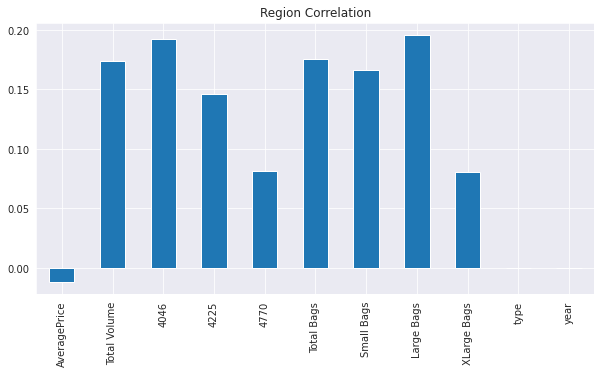

In [54]:
#Checking coorelation
plt.figure(figsize = (10,5))
av.drop('region',axis=1).corrwith(av['region']).plot(kind='bar')
plt.title('Region Correlation')
plt.show()

Region has positive coorelation with all columns, highest with PLU 4770

In [33]:
av_1 = av.copy()

In [34]:
# Rectifying skewness closer to zero
list = ['Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags','Large Bags','XLarge Bags']
for i in list:
    if av_1[i].skew()>0.01:
        av_1[i]=np.log1p(av_1[i])

During trial it was identified that though skewness had no impact on classification but skewness removal to +/-0.01 had impact on regression model

In [35]:
# To calculate Z score
from scipy.stats import zscore
z = np.abs(zscore(av_1))
threshold = 3
print(np.where(z<3))
print(av_1.shape)
new_av= av_1[(z<3).all(axis=1)]
print(new_av.shape)

(array([    0,     0,     0, ..., 18248, 18248, 18248]), array([ 0,  1,  2, ...,  9, 10, 11]))
(18249, 12)
(17520, 12)


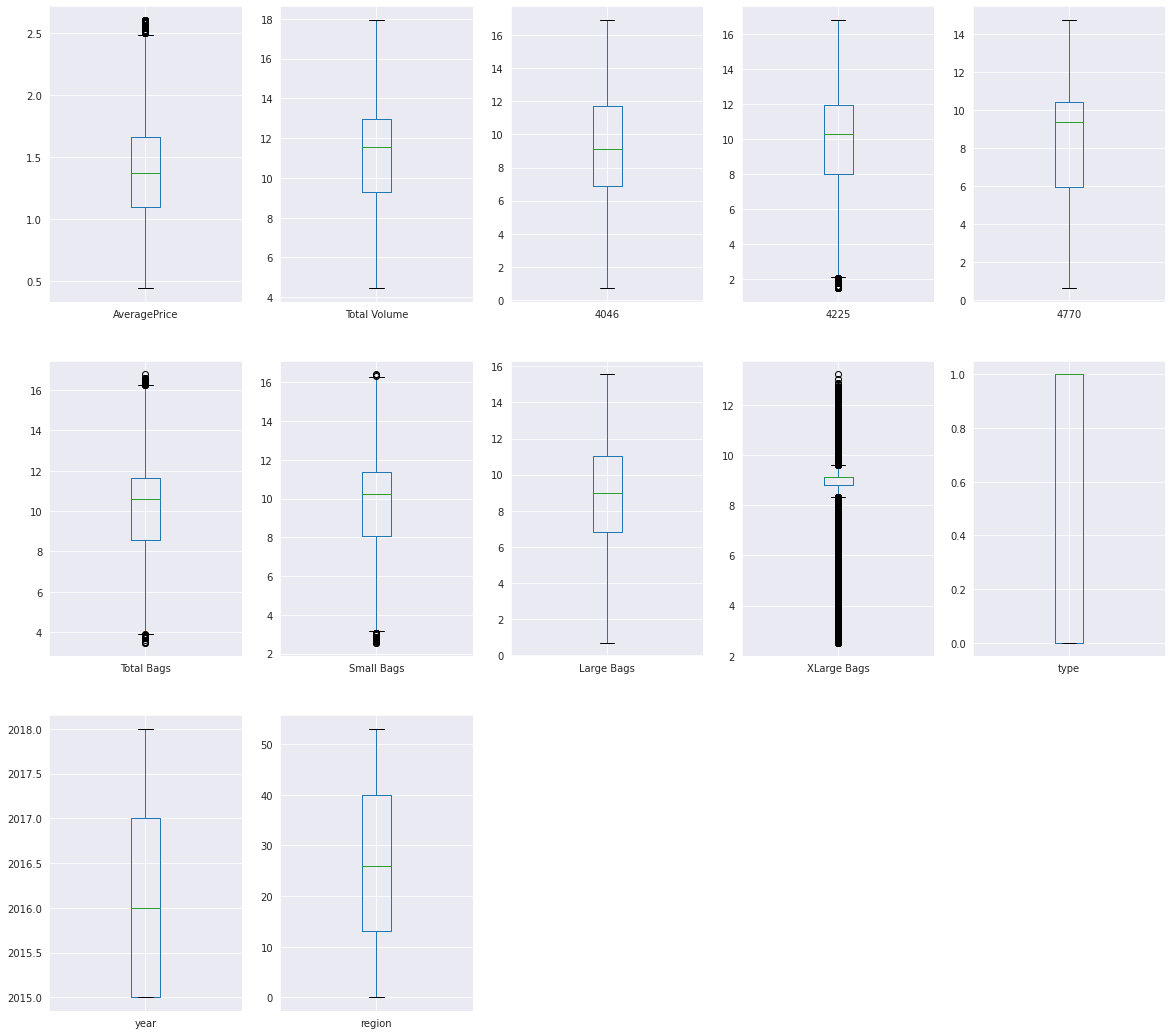

In [55]:
# Rechecking the outliers
new_av.plot( kind = 'box', subplots = True, layout =(4,5), figsize=(20,25))
sns.set_style('darkgrid')
plt.show()

# Though significant outliers are removed from many columns

In [ ]:
cor_new_av = new_av.corr()
plt.figure(figsize=(15,10))
plt.title('CORRELATION')
sns.heatmap(cor_new_av, annot = True)
plt.show()

Numerical visual representation of correlation
Average price has negative correlation with all attributes
region has positive coorelation with most attributes except Average price,4770, XLarge Bags and Year

# Building model

In [38]:
#Importing required libraries
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, RandomForestClassifier, AdaBoostClassifier, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
import xgboost
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score, classification_report,confusion_matrix
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor

# Regression Model

In [ ]:
# Defining independent & dependent variables for both approaches
x = new_av.drop(['AveragePrice'], axis=1)
y = pd.DataFrame(new_av['AveragePrice'])
ssc = StandardScaler()
x = ssc.fit_transform(x)

In [40]:
print(x.shape)
print(y.shape)

(17520, 11)
(17520, 1)


In [41]:
# identifying best random state
best_random_state = 0
accu = 0
for i in range(30,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.1, random_state = i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    predlr = lr.predict(x_test)
    r2s = r2_score(y_test,predlr)
    if r2s > accu:
        accu = r2s
        best_random_state = i
        
        
print(f'The best random state is {best_random_state} with accuracy is {round(accu *100)}%')

The best random state is 82 with accuracy is 55%


In [42]:
# Identifying best algorithm with identified random state
import warnings
warnings.filterwarnings('ignore')
list=[LinearRegression(),Lasso(alpha = 0.0001),Ridge(alpha = 0.0001), 
      ElasticNet(alpha = 0.0001), KNeighborsRegressor(), RandomForestRegressor(), AdaBoostRegressor(), 
      DecisionTreeRegressor(), xgboost.XGBRegressor(), GradientBoostingRegressor()]
for m in list:
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1, random_state = 80)
    m.fit(x_train,y_train)
    pred = m.predict(x_test)
    cv_score = cross_val_score(m,x,y,cv= 10).mean()
    print(f'For algorithm {m} R2 Score is {r2_score(y_test,pred)*100}\n')

For algorithm LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) R2 Score is 55.090483156134

For algorithm Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False) R2 Score is 55.0643614311297

For algorithm Ridge(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001) R2 Score is 55.090482900071336

For algorithm ElasticNet(alpha=0.0001, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False) R2 Score is 55.07549711405149

For algorithm KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                  

Best Algorithm identified is Random Forest Regressor with 85.33% accuracy

In [43]:
#Checking for best parameters for regressor algorithms
parameters = {'n_estimators':[0,10], 'criterion': ['mse', 'mae']}
rfr = RandomForestRegressor()
clf=GridSearchCV(rfr,parameters)
clf.fit(x_train,y_train)
clf.best_params_

{'criterion': 'mse', 'n_estimators': 10}

In [46]:
# Developing model with default parameters
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .1, random_state = 82)
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
rfrpred = rfr.predict(x_test)
print('R2 Score is = ',r2_score(y_test,rfrpred)*100)
print('Mean Sq. Error = ',mean_squared_error(y_test,rfrpred))
print('Mean abs. Error = ',mean_absolute_error(y_test,rfrpred))
cvscore = cross_val_score(rfr,x,y,cv =10).mean()
print('cv score is =',cvscore)

R2 Score is =  85.8174414889153
Mean Sq. Error =  0.021401254126712326
Mean abs. Error =  0.10395861872146117
cv score is = 0.304485598419772


R2 Score acheived with default parameters is better than identified parameters i.e 85% and mean sqr error is 2.14% hence model can be accepted

# Classification Model

In [56]:
# Identifying best Classification model
list=[KNeighborsClassifier(), RandomForestClassifier(),AdaBoostClassifier(), 
      DecisionTreeClassifier(), xgboost.XGBClassifier(), GradientBoostingClassifier()]
x1 = new_av.drop(['region'], axis=1)
y1 = new_av['region']
print(x1.shape)
print(y1.shape)
from sklearn.preprocessing import power_transform
x1 = power_transform(x,method = 'yeo-johnson')

for m in list:
    x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size = 0.25, random_state = 80)
    m.fit(x1_train,y1_train)
    pred = m.predict(x1_test)
    print(f'For algorithm {m} Accuracy Score is {accuracy_score(y1_test,pred)*100}')

(17520, 11)
(17520,)
For algorithm KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') Accuracy Score is 93.9269406392694
For algorithm RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) Accuracy Score is 99.47488584474885
For algorithm AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=Non

Decision Tree Classifier & XGBoost classifier are the best algorithms with 100% accuracy score with default parameters, hence using same for building model

In [48]:
# Building the model with Decision Tree Classifier
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size = 0.25, random_state = 80)
dtc = DecisionTreeClassifier()
dtc.fit(x1_train,y1_train)
pred = dtc.predict(x1_test)
print(f'For algorithm {m} Accuracy Score is {accuracy_score(y1_test,pred)*100}\n')
print(f'Confusion matrix is \n {confusion_matrix(y1_test,pred)}')
print(f'Classification report is \n {classification_report(y1_test,pred)}')
print(f'Cross val score is {cross_val_score(m,x1,y1,cv= 10).mean()}')

For algorithm GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) Accuracy Score is 100.0

Confusion matrix is 
 [[77  0  0 ...  0  0  0]
 [ 0 92  0 ...  0  0  0]
 [ 0  0 88 ...  0  0  0]
 ...
 [ 0  0  0 ... 94  0  0]
 [ 0  0  0 ...  0 71  0]
 [ 0  0  0 ...  0  0 88]]
Classification report is 
               precision    recall  f1-score   support

    

The model shows good accuracy & CV score

In [57]:
# Testing the models
y1_pred = dtc.predict(x1)
y_pred = rfr.predict(x)

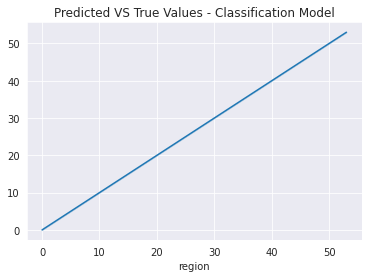

In [58]:
sns.lineplot(y1,y1_pred)
plt.title('Predicted VS True Values - Classification Model')
plt.show()

Graph dispalys the ideal curve confirming 100% accuracy

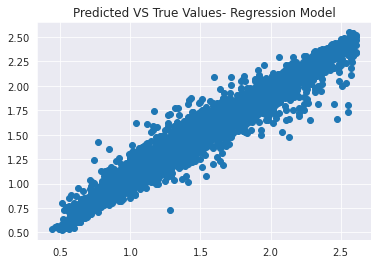

In [59]:
plt.scatter(y,y_pred)
plt.title('Predicted VS True Values- Regression Model')
plt.show()

Since model accuracy is only 85% hence a very scattered graph

In [75]:
y1_test.unique()

array([31, 11, 39,  6, 22, 26, 46, 18,  7, 34, 49, 25, 41,  4, 27, 45, 32,
       12, 17, 15, 19, 48,  1, 16,  5, 44, 43, 23, 53,  8, 51, 38, 40, 24,
        2, 29, 14, 42, 28, 10, 47, 33, 20, 52, 13,  9, 37, 35, 30, 50,  3,
       21,  0, 36])

Since the target variable is multiclass hence ROC Curve can not be drawn 

# Saving The Best Models

In [60]:
import joblib
joblib.dump(rfr,'Price Pridiction.obj')

['Price Pridiction.obj']

In [61]:
joblib.dump(dtc,'Region Prediction.obj')

['Region Prediction.obj']